

*   **House Price Prediction using Python**






**About this Dataset**

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**Variable	Description**

**id**	- A notation for a house

**date**	- Date house was sold

**price**	- Price is prediction target

**bedrooms**	- Number of bedrooms

**bathrooms**	- Number of bathrooms

**sqft_living**	- Square footage of the home

**sqft_lot**	- Square footage of the lot

**floors**	- Total floors (levels) in house

**waterfront**	- House which has a view to a waterfront

**view**	- Has been viewed

**condition**	- How good the condition is overall

**grade**	- overall grade given to the housing unit, based on King County grading system

**sqft_above**	- Square footage of house apart from basement

**sqft_basement**	- Square footage of the basement

**yr_built**	- Built Year

**yr_renovated**	- Year when house was renovated

**zipcode**	- Zip code

**lat**	- Latitude coordinate

**long**	- Longitude coordinate

**sqft_living15**	- Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

**sqft_lot15**	- LotSize area in 2015(implies-- some renovations)



In [158]:
# importing all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [159]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Projects/House Price Prediction/kc_house_data.csv')

In [160]:
# let's see what we have in our data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503



**About Features**


*   Columns with Categorical Data - view, bedrooms, bathrooms, floors, condition, grade, waterfront
*   Columns with Numerical Data - price, sqft_living, sqft_lot,sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15

In [161]:
# how much data do we have!
df.shape

(21613, 21)

In [162]:
# Dtype's of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [163]:
# How many missing values are there in our dataset?
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [164]:
# Let's see our data mathematically
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [165]:
# duplicate values
df.duplicated().sum()

0

In [166]:
# Correlation between columns with price
df.corr()['price']*100

id                -1.676220
price            100.000000
bedrooms          30.834960
bathrooms         52.513751
sqft_living       70.203505
sqft_lot           8.966086
floors            25.679389
waterfront        26.636943
view              39.729349
condition          3.636179
grade             66.743426
sqft_above        60.556730
sqft_basement     32.381602
yr_built           5.401153
yr_renovated      12.643379
zipcode           -5.320285
lat               30.700348
long               2.162624
sqft_living15     58.537890
sqft_lot15         8.244715
Name: price, dtype: float64

From above correlation data bathrooms,sqft_living,grade,sqft_above,sqft_living15 these columns are positively correlated with price. Which means if these values increases then price also increases.

**Exploratory Data Analysis**

<Axes: xlabel='condition', ylabel='Count'>

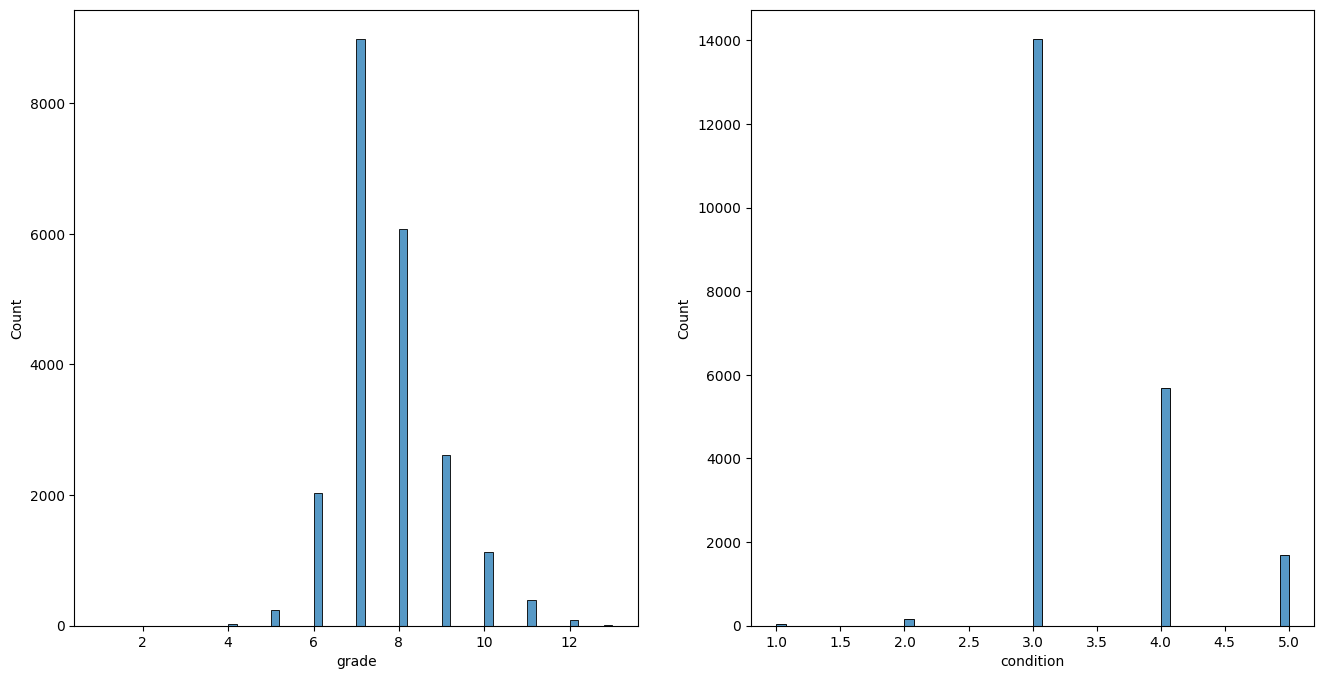

In [167]:

fig = plt.figure(figsize=(16,8))
fig.add_subplot(121)
sns.histplot(df['grade'],bins=60)

fig.add_subplot(122)
sns.histplot(df['condition'])



*   From tha data we have the houses has divided  into 13 grades. And from current data most of houses are of 7 & 8 grade. Another thing is their condition. We can say they from all houses condition most houses are not in best condition, but they are in good condition with rating of 3.




<Axes: xlabel='sqft_living', ylabel='sqft_above'>

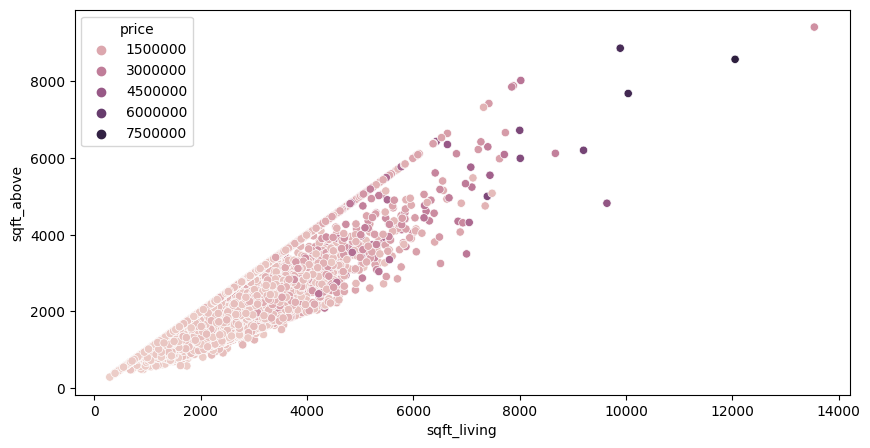

In [168]:
# histogram on price data
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['sqft_living'],y=df['sqft_above'],hue=df['price'])

As sqft_living increases price also increases

<Axes: xlabel='yr_built', ylabel='price'>

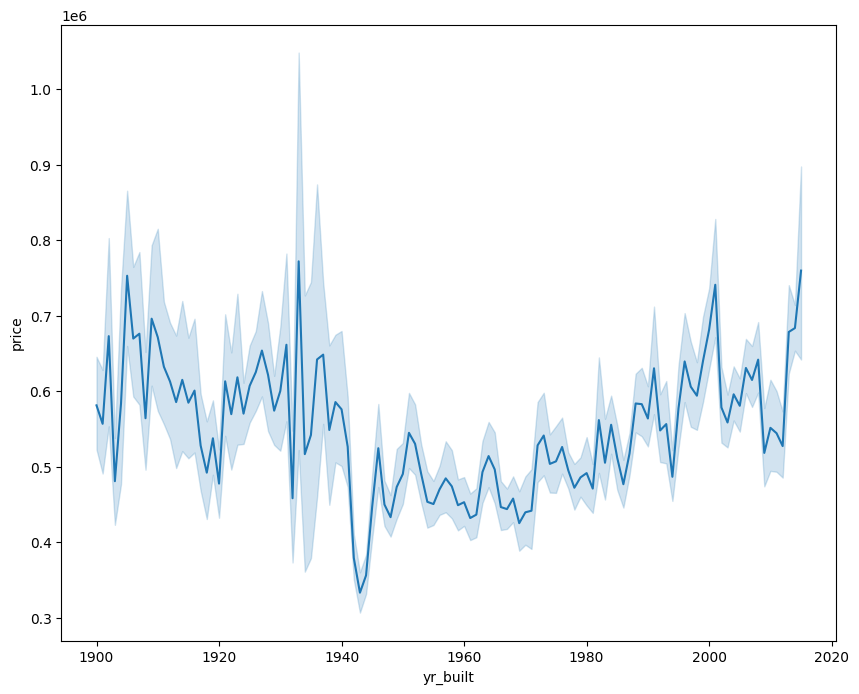

In [169]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,y=df['price'], x=df['yr_built'])

<Axes: xlabel='grade', ylabel='price'>

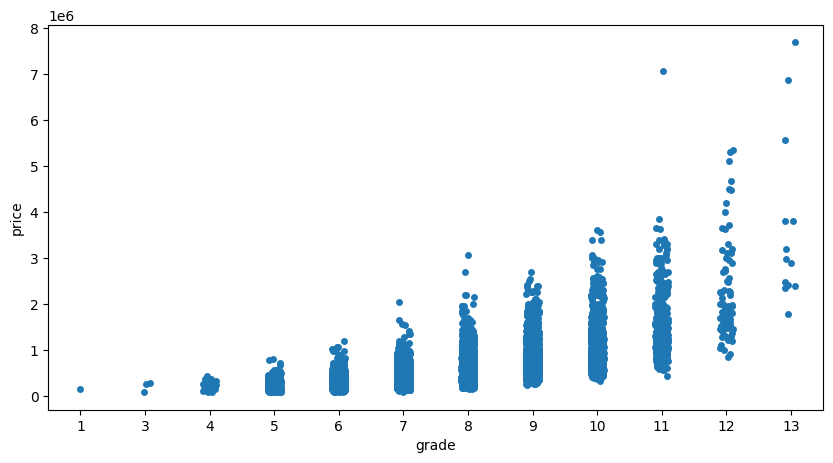

In [170]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['grade'],y=df['price'])

<Axes: xlabel='condition', ylabel='price'>

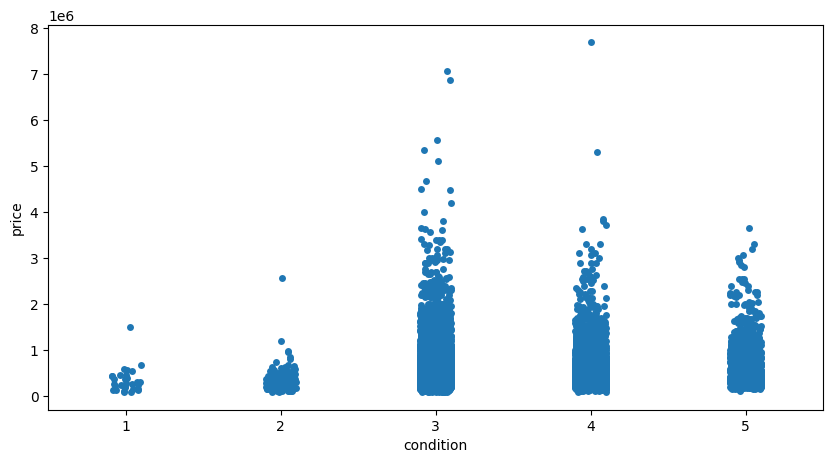

In [171]:
plt.figure(figsize=(10,5))
sns.stripplot(x=df['condition'],y=df['price'])

<Axes: xlabel='bedrooms', ylabel='bathrooms'>

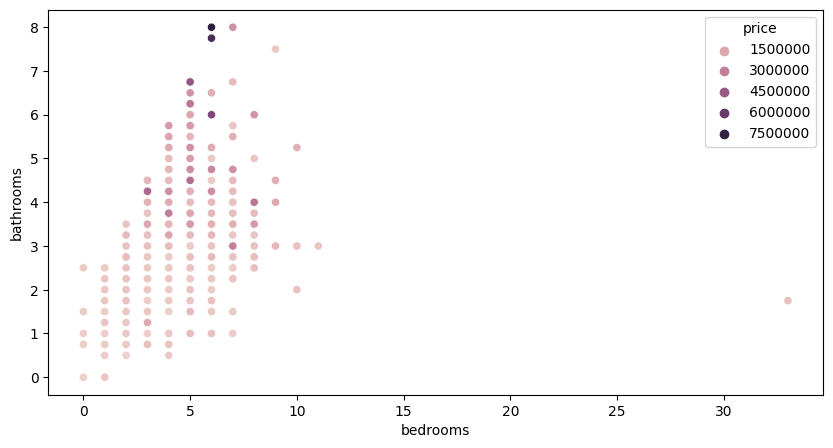

In [172]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['bedrooms'],y=df['bathrooms'],hue=df['price'])

<Axes: >

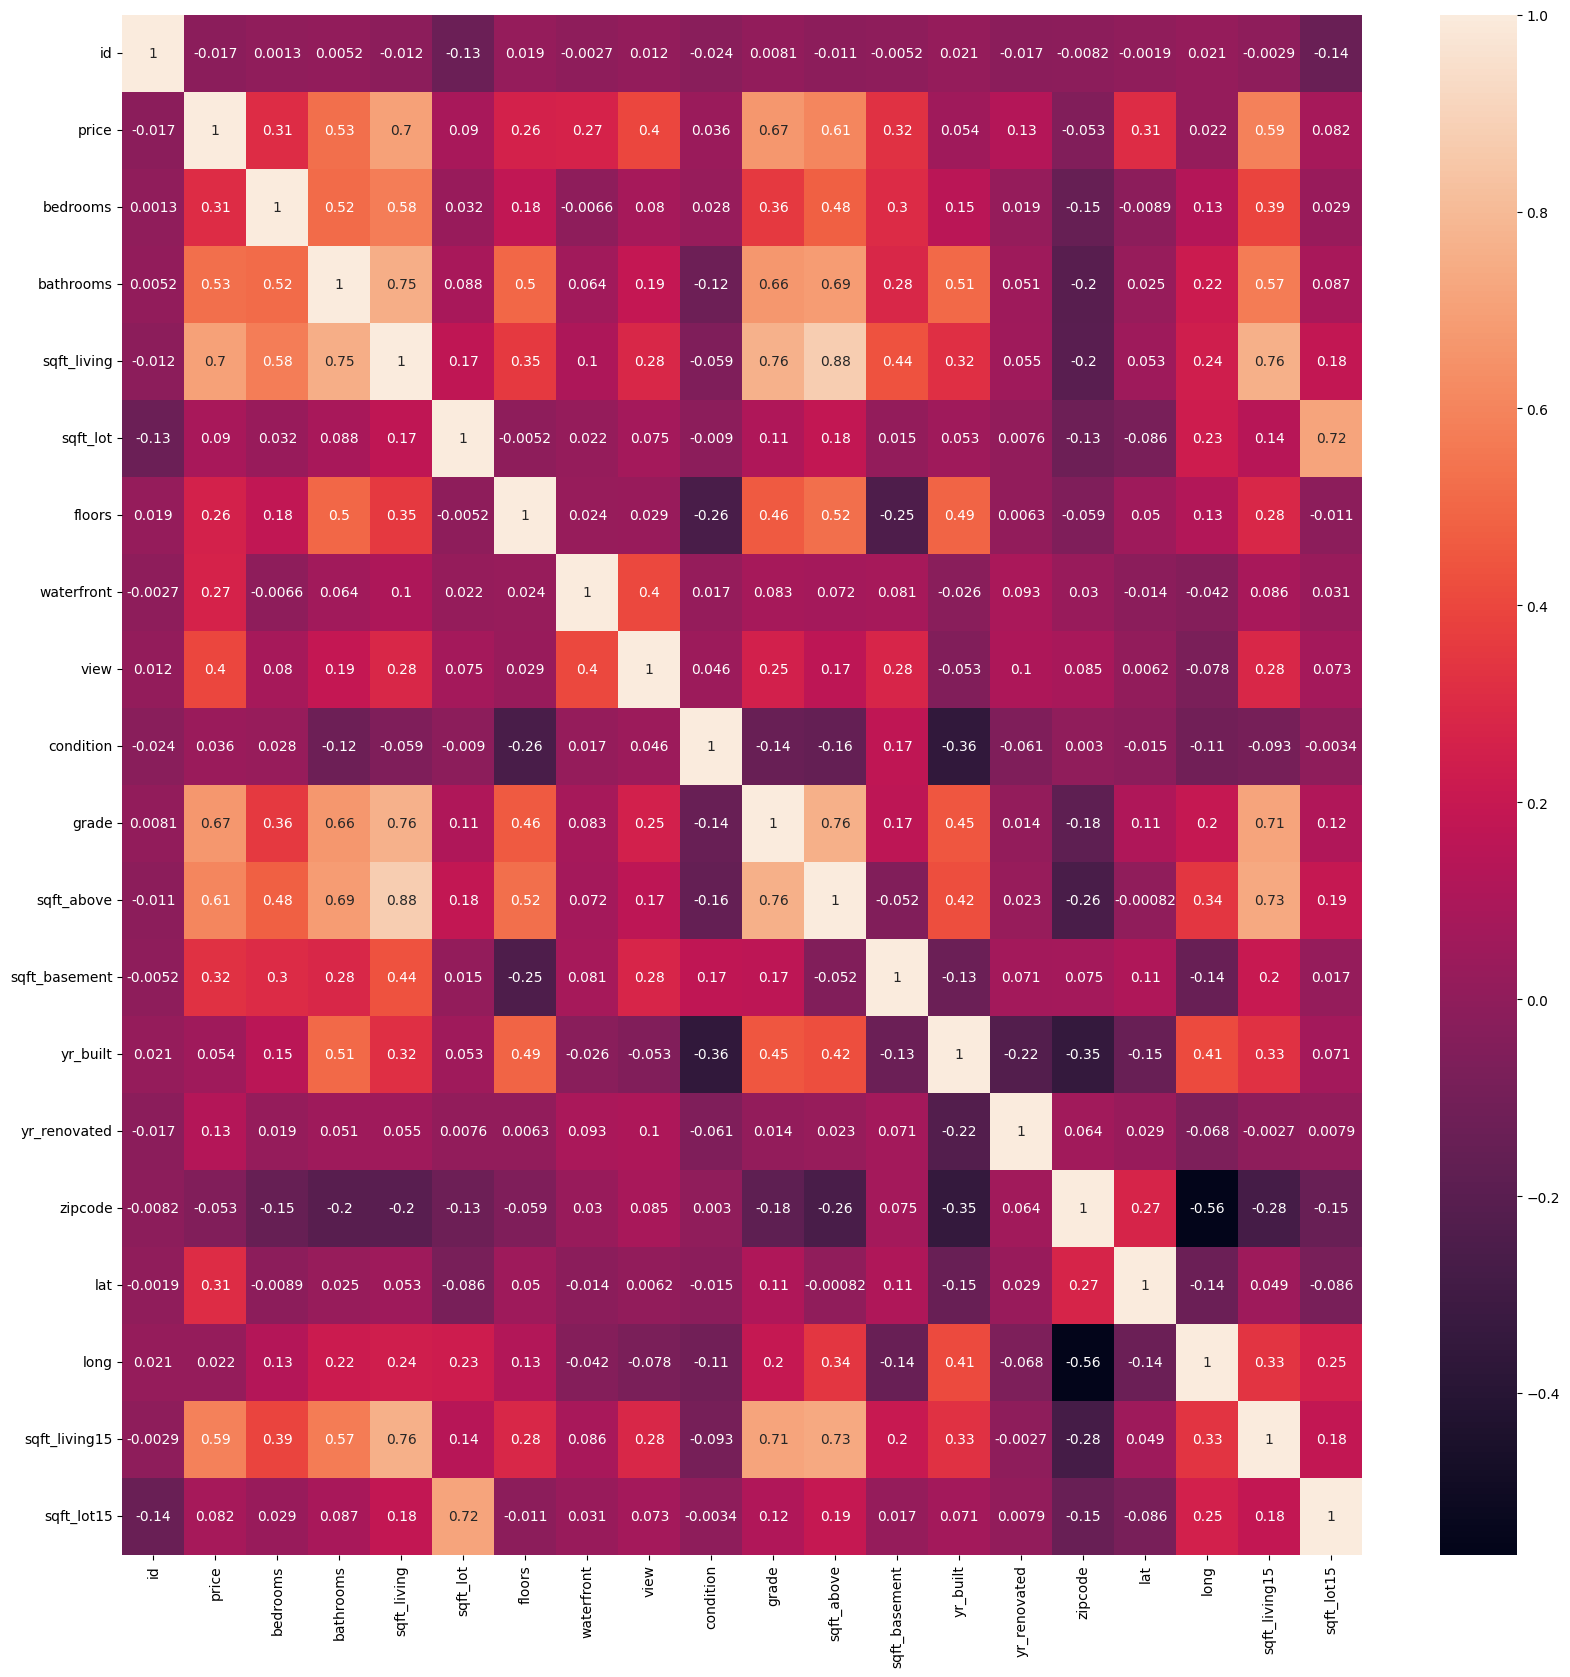

In [173]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

From above visualization:


*  As sqft_living and sqft_abv increases price of the house also increases.
*  From grade column as grade of the house increases, price of the house increases.

*   For condition column, condition 3,4 and 5 house have almost same price.





---
**Outlier Detection and removal**

In [174]:
# columns having correlation with price
df_corr = df[['bathrooms','sqft_living','grade','sqft_above','sqft_living15']]

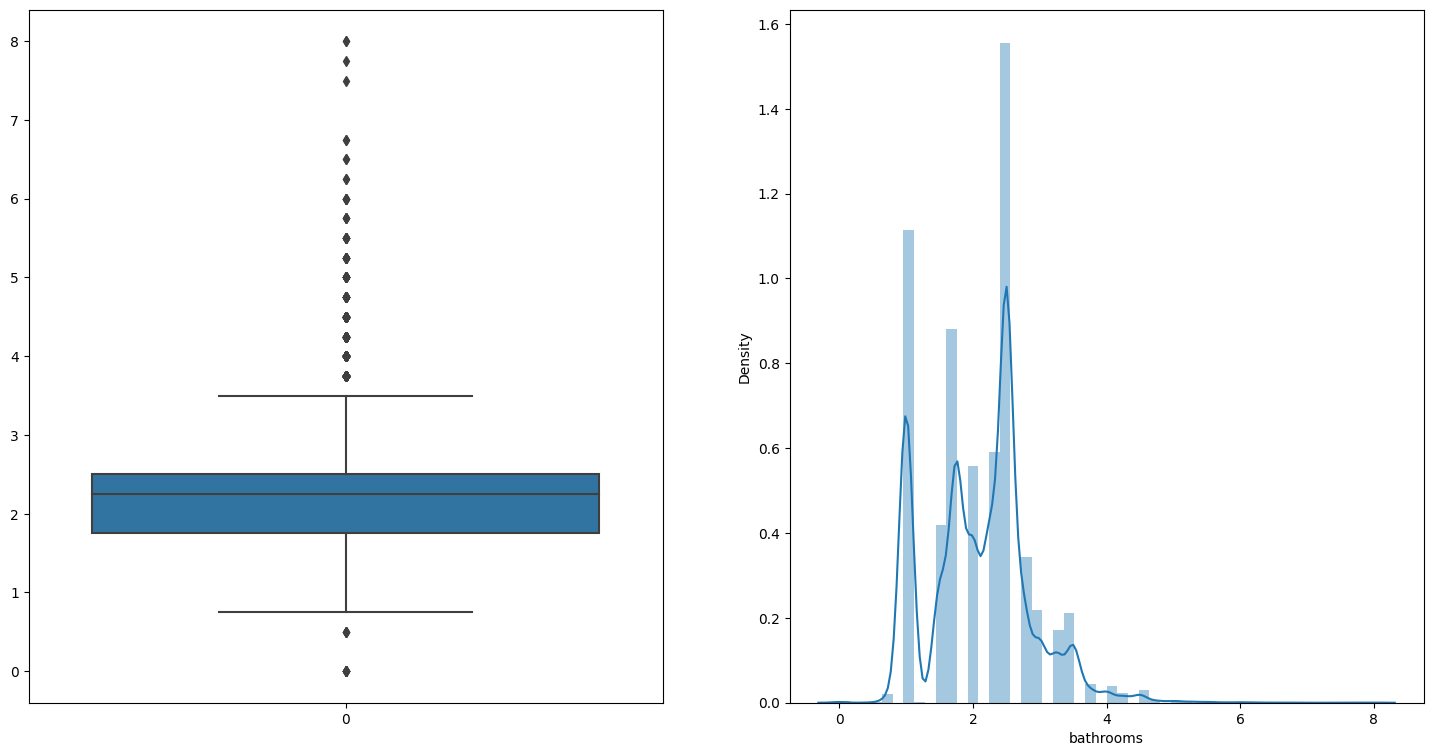

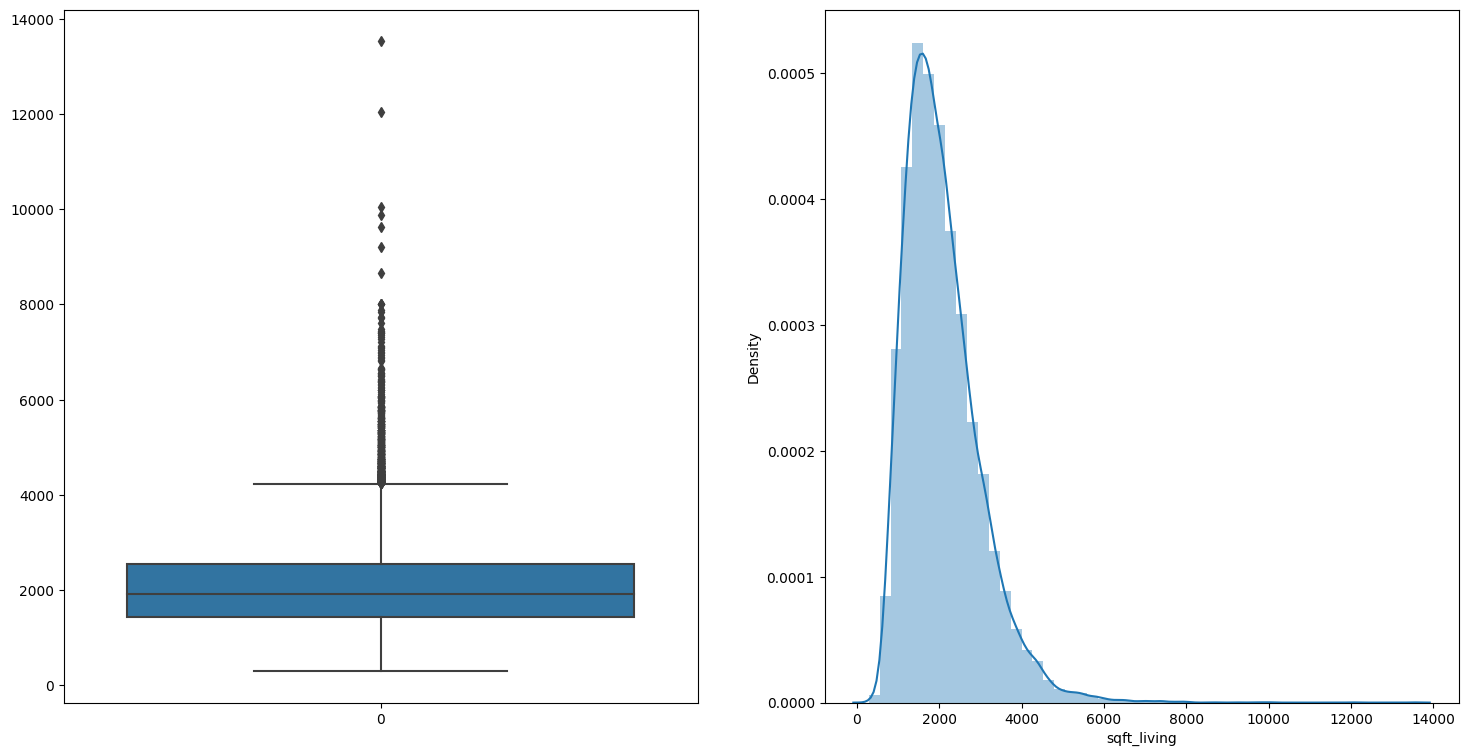

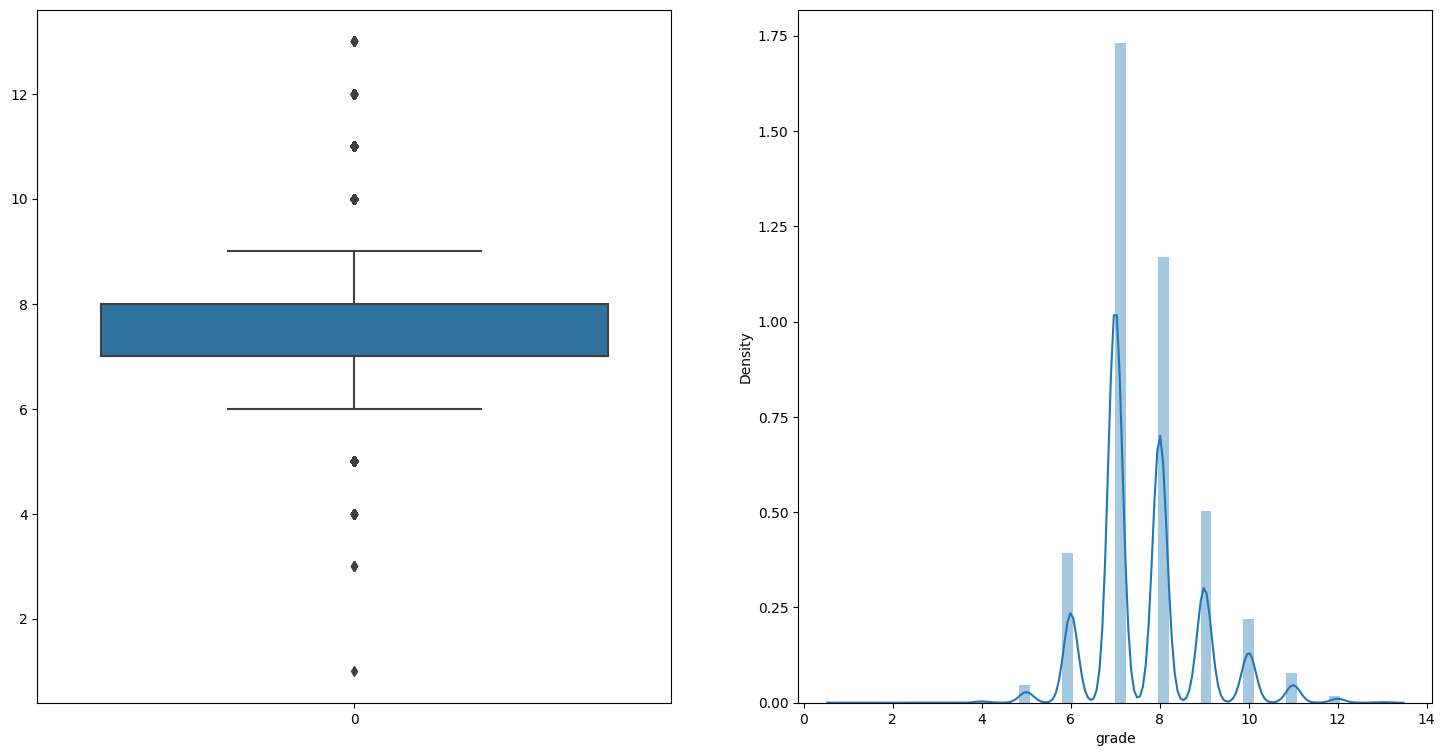

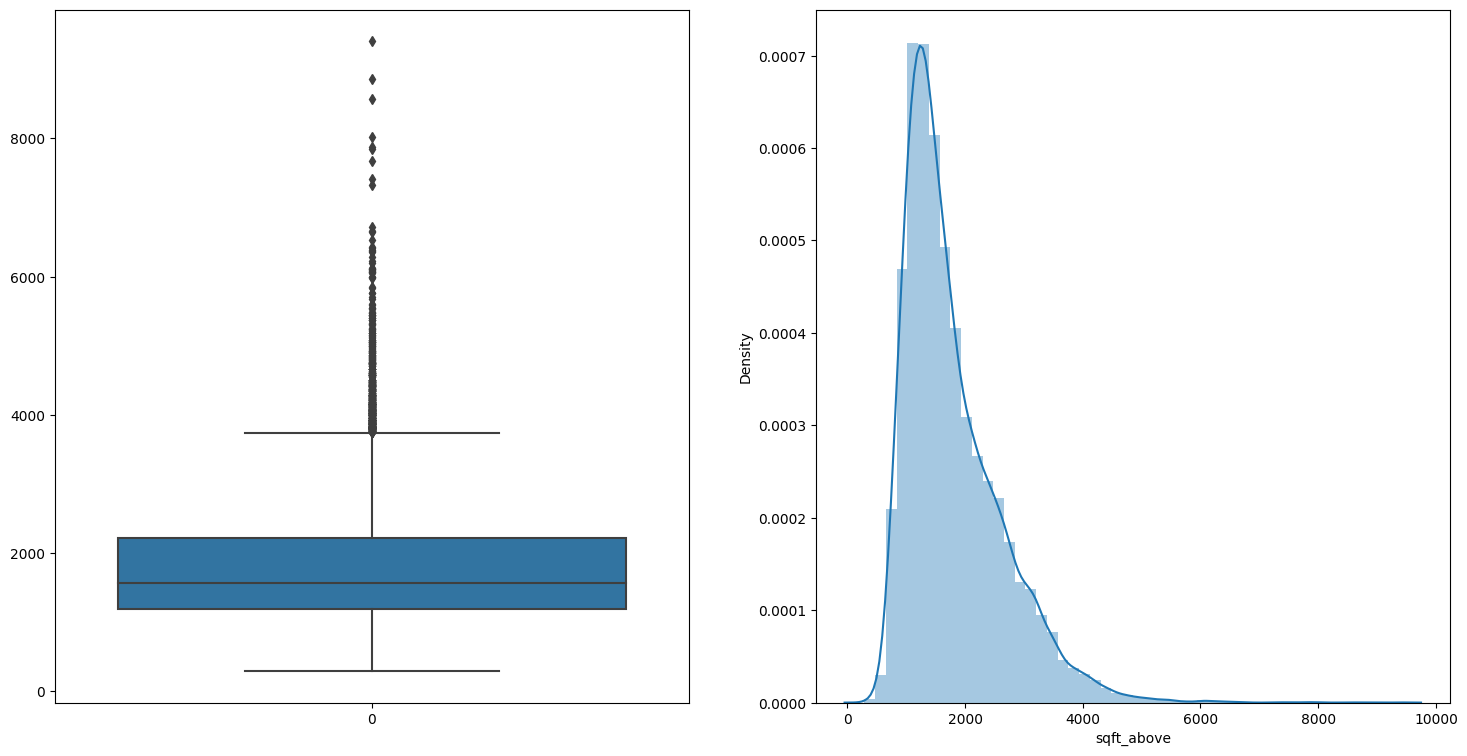

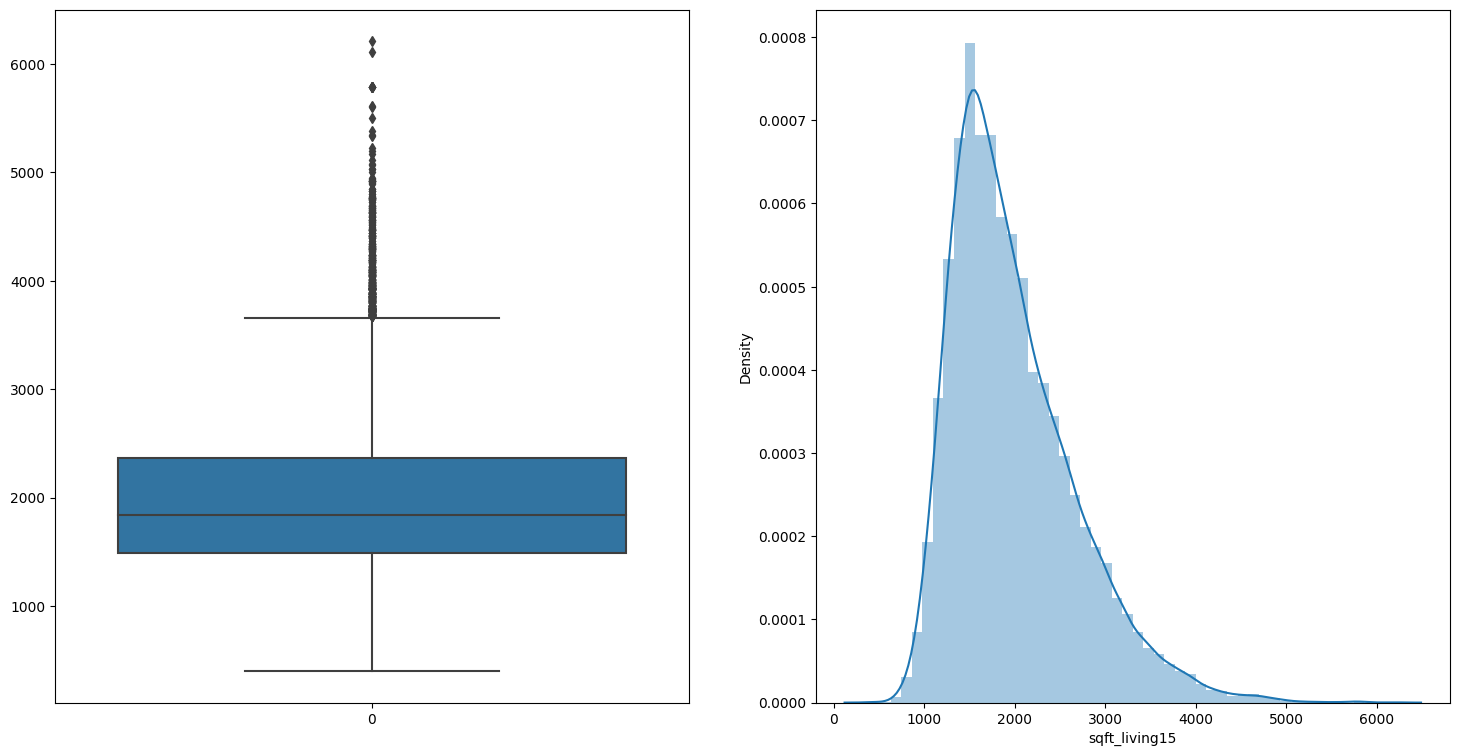

In [175]:
for col in df_corr.columns:
  fig = plt.figure(figsize=(18,9))
  fig.add_subplot(121)
  sns.boxplot(df_corr[col])

  fig.add_subplot(122)
  sns.distplot(df_corr[col])

In [176]:
def capping_outlier(df, column):
    # finding boundary values
    print('highest allowed:', df[column].mean() + 3*df[column].std())
    print('lowest allowed:', df[column].mean() - 3*df[column].std())

    # calculating upper limit lower limit
    upper_limit = df[column].mean() + 3*df[column].std()
    lower_limit = df[column].mean() - 3*df[column].std()
    # capping --> winsorization
    df[column] = np.where(
        df[column] > upper_limit,
          upper_limit,
            np.where(
                df[column] < lower_limit,
              lower_limit,
            df[column]
          )
        )

Outlier removal for sqft_living

In [177]:
capping_outlier(df, 'sqft_living')

highest allowed: 4835.222427410272
lowest allowed: -675.4229548705971


In [178]:
# capping outliers of sqft_lot
capping_outlier(df, 'sqft_lot')

highest allowed: 139368.5021112233
lowest allowed: -109154.56697958957


Outlier removal of sqft_living15

In [179]:
# capping outliers of sqft_living15
capping_outlier(df, 'sqft_living15')

highest allowed: 4042.7264043143405
lowest allowed: -69.62142120232488


In [180]:
# changing date column from object to datetime
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [181]:
# I have removed sqft_above due to multicolinearity issue
X = df.drop(columns=['date','id','zipcode','price','sqft_living15','sqft_above'])
y = df.price

In [213]:
# splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=22)

In [214]:
# scaling the data using standardscaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [215]:
# using linear regression as a model
lr = LinearRegression()
# fitting the model
lr.fit(X_train,y_train)

LinearRegression()

In [216]:
# prediction
y_pred = lr.predict(X_test)

In [217]:
# model evaluation
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('mean_absolute_squared_error:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test, y_pred))
print('Adjusted r2: ', round(1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3))

mean_absolute_error: 127355.3726304988
mean_squared_error: 40662248229.212204
mean_absolute_squared_error: 201648.82402139666
r2_score: 0.6684285168603391
Adjusted r2:  0.668


<Axes: xlabel='price', ylabel='Density'>

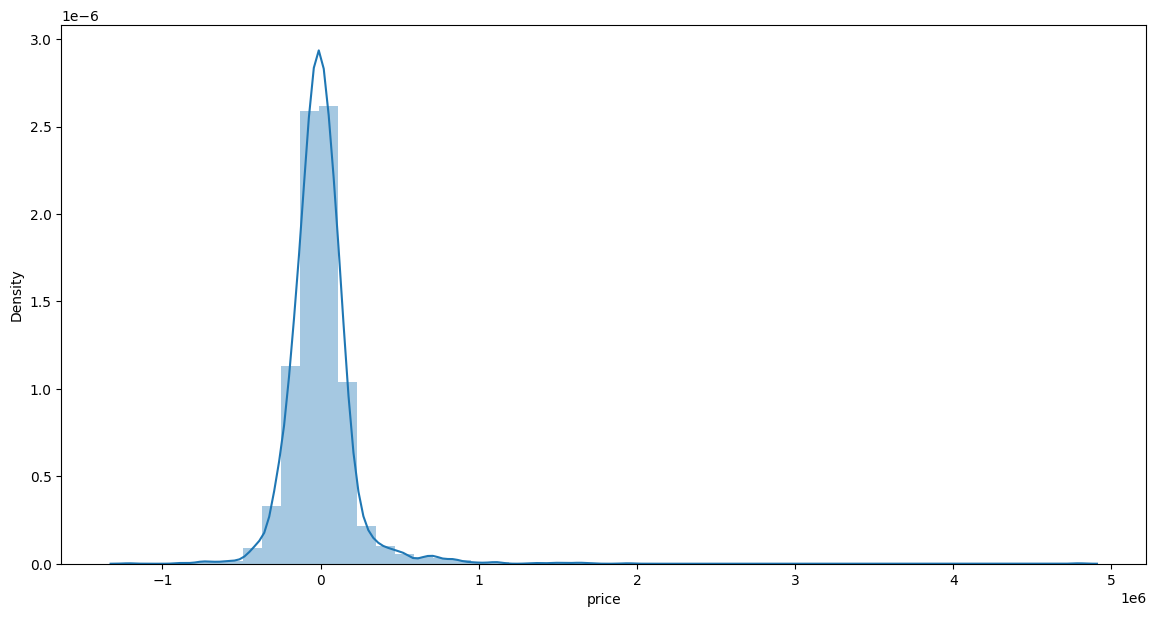

In [187]:
# plotting residuals
plt.figure(figsize=(14,7))
sns.distplot(y_test - y_pred)



*   **Using Polynomial Regression**



In [188]:
from sklearn.preprocessing import PolynomialFeatures

In [189]:
# creating polynomial object
poly = PolynomialFeatures(degree=2, include_bias=True)

In [218]:
# new transformed X_train and X_test using Polynomial Regression
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [219]:
lr.fit(X_train_trans, y_train)

LinearRegression()

In [220]:
pred1 = lr.predict(X_test_trans)

In [221]:
# Model evaluation
print('mean_absolute_error:',mean_absolute_error(y_test, pred1))
print('mean_squared_error:',mean_squared_error(y_test, pred1))
print('mean_absolute_squared_error:',np.sqrt(mean_squared_error(y_test, pred1)))
print('r2_score:',r2_score(y_test, pred1))

mean_absolute_error: 106915.97563232573
mean_squared_error: 30696348602.821407
mean_absolute_squared_error: 175203.7345572902
r2_score: 0.7496932836611445


<Axes: xlabel='price', ylabel='Density'>

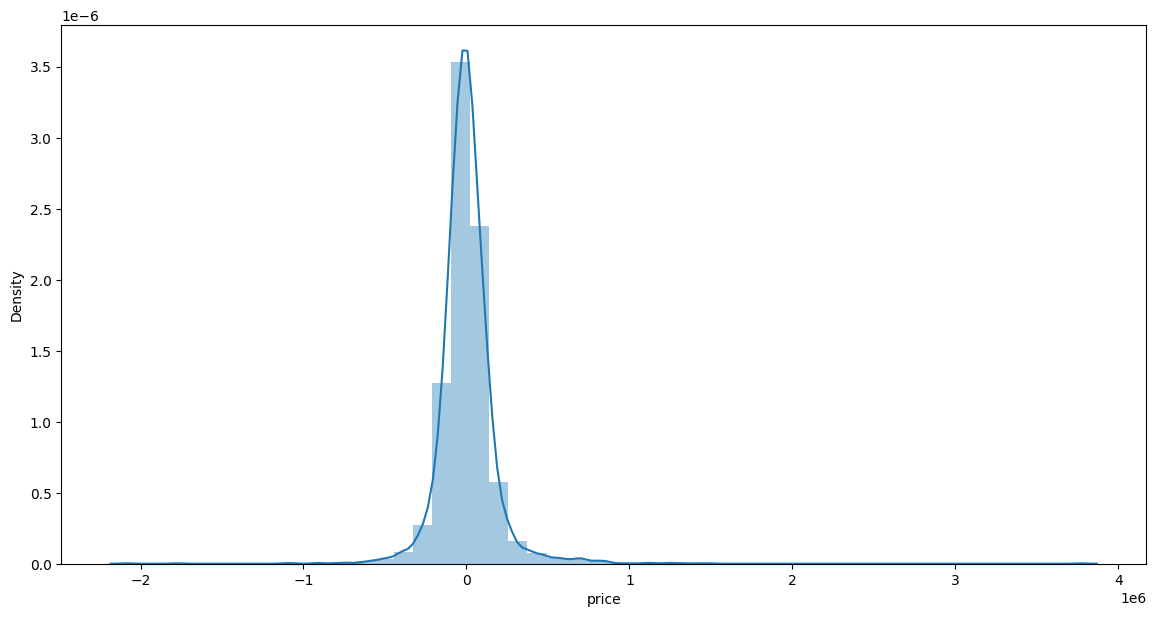

In [196]:
# plotting residuals
plt.figure(figsize=(14,7))
sns.distplot(y_test - pred1)

---
**Using another approach**

In [197]:
# as sqft_living15 and sqft_above are highly correlated they are giving the same information so adding both of the columns to new newsqft_above column
# it will also solve multicollinearity problem
df['newsqft_above'] = df['sqft_living15'] + df['sqft_above']

In [198]:
# same doing for sqft_lot and for sqft_lot15 column
df['newsqft_lot'] = df['sqft_lot'] + df['sqft_lot15']

In [199]:
# droping the originals columns
df.drop(columns=['sqft_living15','sqft_above','sqft_lot','sqft_lot15','sqft_living'], inplace=True)

In [200]:
# splitting target variable
X1 = df.drop(columns=['date','id','zipcode','price'])
y1 = df.price

In [201]:
# applying train teest split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=22)

In [202]:
# scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [203]:
#fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [204]:
# prediction
y_pred2 = lr.predict(X_test)

In [205]:
# model evaluation
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred2))
print('mean_squared_error:',mean_squared_error(y_test, y_pred2))
print('mean_absolute_squared_error:',np.sqrt(mean_squared_error(y_test, y_pred2)))
print('r2_score:',r2_score(y_test, y_pred2))
print('Adjusted r2: ', round(1 - (1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),3))

mean_absolute_error: 127248.78994377212
mean_squared_error: 39370197512.45016
mean_absolute_squared_error: 198419.24682966157
r2_score: 0.6789642641715437
Adjusted r2:  0.678


**Using polynomial regression**

In [206]:
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [207]:
lr.fit(X_train_trans, y_train)

LinearRegression()

In [208]:
pred3 = lr.predict(X_test_trans)

In [209]:
print('mean_absolute_error:',mean_absolute_error(y_test, pred3))
print('mean_squared_error:',mean_squared_error(y_test, pred3))
print('mean_absolute_squared_error:',np.sqrt(mean_squared_error(y_test, pred3)))
print('r2_score:',r2_score(y_test, pred3))

mean_absolute_error: 103706.91949413942
mean_squared_error: 26471151451.905304
mean_absolute_squared_error: 162699.57422164726
r2_score: 0.7841467373410681


------

**r2_score with different approaches**

In [223]:
print('r2_score with simple Linear Regression:',r2_score(y_test, y_pred))
print('r2_score with simple plynomial Regression:',r2_score(y_test, pred1))
print('r2_score with simple Linear Regression but using new approach:',r2_score(y_test, y_pred2))
print('r2_score with simple plynomial Regression but using new approach:',r2_score(y_test, pred3))

r2_score with simple Linear Regression: 0.6684285168603391
r2_score with simple plynomial Regression: 0.7496932836611445
r2_score with simple Linear Regression but using new approach: 0.6789642641715437
r2_score with simple plynomial Regression but using new approach: 0.7841467373410681
